

## Lab 2

Welcome to the second lab of the AIML!
In addition to implementing code, there will be questions that you must answer which relate to the lab and your implementation. Each question you will answer is preceded by a **'Question X'** header. Carefully read each question and provide you answer or code in the following textboxes with **'Answer:'** header. Your lab submission will be evaluated based on your answers to each of the questions and the implementation you provide.

# Every question is of 1 mark.

## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Probabilty Distributions

5) Linear Regression

## Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm on a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

Hint: You can import ttest function from scipy to perform t tests 

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

#### Answer:

In [47]:
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind, levene, f_oneway
import pandas as pd
import seaborn as sb
GPU1 = pd.DataFrame([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = pd.DataFrame([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

# As the testing is done on two different GPUs, we have 2 different samples.
# The outcome of the 1st sample does not have any bearing on the second sample. Hence we can say
# that they are independent.
t_statistic, p_value = ttest_ind(GPU1, GPU2)
print("t-statistic", t_statistic)
print("p-value", p_value)

print("---- Using 95% confidence level ----")
if(p_value < .05):
    print("Null hypothesis (No significant difference between speeds of GPU1 and GPU2) is REJECTED.")
    print("Alternate hypothesis (There is a significant difference between speeds of GPU1 and GPU2) is ACCEPTED.")
else:
    print("Null hypothesis (No significant difference between speeds of GPU1 and GPU2) stands TRUE i.e. ACCEPTED.")

/opt/apps/anaconda/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/opt/apps/anaconda/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


t-statistic [-2.62762951]
p-value [0.01379428]
---- Using 95% confidence level ----
Null hypothesis (No significant difference between speeds of GPU1 and GPU2) is REJECTED.
Alternate hypothesis (There is a significant difference between speeds of GPU1 and GPU2) is ACCEPTED.


[## Question 2 ](https://)
He is trying a third GPU which is GPU3.

In [7]:
GPU3 = pd.DataFrame([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

In [8]:
# Null hypothesis is there is no significant difference between the speeds of GPU1 and GPU3
# Alternate hypothesis - there is significant difference between speeds of GPU1 and GPU3
t_statistic, p_value = ttest_ind(GPU1, GPU3)
print("t-statistic", t_statistic)
print("p-value", p_value)

print("---- Using 95% confidence level ----")
if(p_value < .05):
    print("Null hypothesis (No significant difference between speeds of GPU1 and GPU3) is REJECTED.")
    print("Alternate hypothesis (There is a significant difference between speeds of GPU1 and GPU3) is ACCEPTED.")
else:
    print("Null hypothesis (No significant difference between speeds of GPU1 and GPU3) stands TRUE i.e. ACCEPTED.")

t-statistic [-1.49889438]
p-value [0.14509211]
---- Using 95% confidence level ----
Null hypothesis (No significant difference between speeds of GPU1 and GPU3) stands TRUE i.e. ACCEPTED.


### ANOVA

## Question 3 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed
But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [11]:
import pandas as pd
e1 = pd.DataFrame([1.595440,1.419730,0.000000,0.000000])
e2 = pd.DataFrame([1.433800,2.079700,0.892139,2.384740])
e3 = pd.DataFrame([0.036930,0.938018,0.995956,1.006970])

Hint - You can use stats.levene function and stats.f_oneway function.

#### Answer:

In [23]:
print("Null hypothesis - Results of all three experiments are not significantly different")
print("Alternate hypothesis - Results of all three experiments are significantly different\n")
# From the dataframe, retrieve the one-dimensional array of values.
levene_result = levene(e1[0], e2[0], e3[0])
# if the pvalue is > .05, then we can say that the variances are equal.
if(levene_result.pvalue > .05):
    print("Levene result p-value = {}. All variances are equal. Proceeding with Anova analysis".format(levene_result.pvalue))
    f, p = f_oneway(e1[0], e2[0], e3[0])
    print('F value:', f)
    print('P value:', p, '\n')
    if(p > .05):
        print('Null hypothesis is TRUE i.e. results of all three experiments are not significantly different')
    else:
        print('Null hypothesis is REJECTED and alternate hypothesis is TRUE i.e. results of all three experiments are significantly different')

else:
    print("The data is not normal")

Null hypothesis - Results of all three experiments are not significantly different
Alternate hypothesis - Results of all three experiments are significantly different

Levene result p-value = 0.12259792666001798. All variances are equal. Proceeding with Anova analysis
F value: 2.51357622845924
P value: 0.13574644501798466 

Null hypothesis is TRUE i.e. results of all three experiments are not significantly different


## Question 4 

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

In [38]:
print('\
Type I error is when the null hypothesis is TRUE but gets rejected i.e. false positive\n \
Example:\n \
Null Hypothesis - Patient does not have a disease\n \
Alternate Hypothesis - Patient has a disease\n \
\n\
Type I error in the context of the above example:\n Null hypothesis is true but gets rejected i.e. even though patient does not have the disease, it still gets reported as the patient having the disease.')

Type I error is when the null hypothesis is TRUE but gets rejected i.e. false positive
 Example:
 Null Hypothesis - Patient does not have a disease
 Alternate Hypothesis - Patient has a disease
 
Type I error in the context of the above example:
 Null hypothesis is true but gets rejected i.e. even though patient does not have the disease, it still gets reported as the patient having the disease.


In [40]:
print('Type II error is when the null hypothesis is FALSE but does not get rejected i.e. false negative\n \
Example:\n \
Null Hypothesis - Patient does not have a disease\n \
Alternate Hypothesis - Patient has a disease\n \
\n \
Type II error in the context of the above example: Null hypothesis is false but does not get rejected i.e. patient does not have the disease, but it still gets reported as the patient having the disease.')

Type II error is when the null hypothesis is FALSE but does not get rejected i.e. false negative
 Example:
 Null Hypothesis - Patient does not have a disease
 Alternate Hypothesis - Patient has a disease
 
 Type II error in the context of the above example: Null hypothesis is false but does not get rejected i.e. patient does not have the disease, but it still gets reported as the patient having the disease.


# Question 5
You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. 
State the null and alternative hypothesis.

In [27]:
print('Null Hypothesis (H0) = Waiting time to place an order in the past month = 4.5 minutes')

Null Hypothesis (H0) = Waiting time to place an order in the past month = 4.5 minutes


In [28]:
print('Alternate Hypothesis (H1) = Waiting time to place an order in the past month != 4.5 minutes')

Alternate Hypothesis (H1) = Waiting time to place an order in the past month != 4.5 minutes


# Question 6 
Get the binomial distribution with n = 10, p = .7 and k = [0, 1, 2, 3, 4, 5, 6, 7]

Hint - Use stats.binom.pmf() function for this.


In [51]:
n = 10
p = .7
k = [0, 1, 2, 3, 4, 5, 6, 7]

# Get the binomial distribution for the provided values of n, p and k.
binom_dist = stats.binom.pmf(k, n=n, p=p)

# Question 7 
Plot the distribution created in the above question.

[Text(0, 0.5, 'Y-axis'), Text(0.5, 0, 'X-axis')]

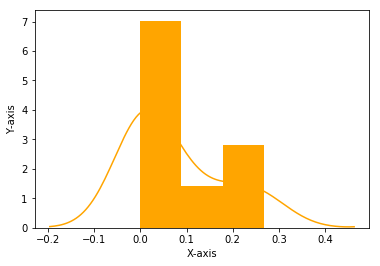

In [52]:
# Plot the binomial distribution
ax = sb.distplot(binom_dist,
                  kde=True,
                  color='orange',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='X-axis', ylabel='Y-axis')

# Linear Regression


# Simple Linear Regression

Here we will try to see that if we can make a regression model to predict one column of a dataset by the use of other coloumn.

## Dataset

Population of U.S. Cities

### Description
The bigcity data frame has 49 rows and 2 columns.

The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken from the 196 largest cities in 1920.

### Format
This data frame contains the following columns:

`u`
The 1920 population.

`x`
The 1930 population.

There is one unnamed column also in this dataset. Please remove and ignore that coloumn.

Source

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.

# Question 8 
Read the dataset given in file named 'bigcity.csv'.

In [109]:
us_cities = pd.read_csv('bigcity.csv')

# Question 9 - Transform the dataset 
Find the number of rows in given dataset and separate the input(u column)  and target variables(x column) into X and Y.

Remove the unnamed coloumn.

Hint: You can shape function to get the size of the dataframe


In [122]:
# To get the count, get the values for column 'u' and print the count
print('Number of rows in the dataset = ', us_cities['u'].count())
print('\n')

# Drop the unnamed column
us_cities.drop(us_cities.columns[us_cities.columns.str.contains('unnamed',case = False)], axis = 1, inplace = True)
print('---- Data frame after removing the unnamed column ----')
print(us_cities)
print('\n\n')

# Retrieve the values for 'u' column
print('---- X column ----')
X = us_cities.iloc[:, :1]
print(X)
print('\n\n')

# Retrieve the values for 'x' column
print('---- Y column ----')
Y = us_cities.iloc[:, 1:2]
print(Y)

Number of rows in the dataset =  49


---- Data frame after removing the unnamed column ----
      u    x
0   138  143
1    93  104
2    61   69
3   179  260
4    48   75
5    37   63
6    29   50
7    23   48
8    30  111
9     2   50
10   38   52
11   46   53
12   71   79
13   25   57
14  298  317
15   74   93
16   50   58
17   76   80
18  381  464
19  387  459
20   78  106
21   60   57
22  507  634
23   50   64
24   77   89
25   64   77
26   40   60
27  136  139
28  243  291
29  256  288
30   94   85
31   36   46
32   45   53
33   67   67
34  120  115
35  172  183
36   66   86
37   46   65
38  121  113
39   44   58
40   64   63
41   56  142
42   40   64
43  116  130
44   87  105
45   43   61
46   43   50
47  161  232
48   36   54



---- X column ----
      u
0   138
1    93
2    61
3   179
4    48
5    37
6    29
7    23
8    30
9     2
10   38
11   46
12   71
13   25
14  298
15   74
16   50
17   76
18  381
19  387
20   78
21   60
22  507
23   50
24   77
25   64
26   40
27  136
28 

## Question 10 - Check the dataset for any missing values and also print out the correlation matrix 

In [123]:
print("---- Checking the dataset for any missing values ----")
print(us_cities.isna())

---- Checking the dataset for any missing values ----
        u      x
0   False  False
1   False  False
2   False  False
3   False  False
4   False  False
5   False  False
6   False  False
7   False  False
8   False  False
9   False  False
10  False  False
11  False  False
12  False  False
13  False  False
14  False  False
15  False  False
16  False  False
17  False  False
18  False  False
19  False  False
20  False  False
21  False  False
22  False  False
23  False  False
24  False  False
25  False  False
26  False  False
27  False  False
28  False  False
29  False  False
30  False  False
31  False  False
32  False  False
33  False  False
34  False  False
35  False  False
36  False  False
37  False  False
38  False  False
39  False  False
40  False  False
41  False  False
42  False  False
43  False  False
44  False  False
45  False  False
46  False  False
47  False  False
48  False  False


You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [124]:
print("\n---- Correlation Matrix ----")
print(us_cities.corr())


---- Correlation Matrix ----
          u         x
u  1.000000  0.981742
x  0.981742  1.000000


### The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# Question 11 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.*

Check: train_test_split function

In [125]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8)
print("---- Training data for 'X' ----")
print(x_train)
print('Shape of x_train data = ', x_train.shape)

print("\n---- Test data for 'X' ----")
print(x_test)
print('Shape of x_test data = ', x_test.shape)

print("\n---- Training data for 'Y' ----")
print(y_train)
print('Shape of y_train data = ', y_train.shape)

print("\n---- Test data for 'Y' ----")
print(y_test)
print('Shape of y_test data = ', y_test.shape)


---- Training data for 'X' ----
      u
6    29
37   46
25   64
3   179
42   40
36   66
9     2
7    23
35  172
10   38
43  116
30   94
5    37
47  161
33   67
17   76
22  507
24   77
18  381
38  121
11   46
41   56
45   43
4    48
15   74
27  136
13   25
23   50
0   138
8    30
1    93
46   43
31   36
14  298
2    61
16   50
34  120
19  387
21   60
Shape of x_train data =  (39, 1)

---- Test data for 'X' ----
      u
29  256
48   36
20   78
39   44
32   45
40   64
12   71
44   87
28  243
26   40
Shape of x_test data =  (10, 1)

---- Training data for 'Y' ----
      x
6    50
37   65
25   77
3   260
42   64
36   86
9    50
7    48
35  183
10   52
43  130
30   85
5    63
47  232
33   67
17   80
22  634
24   89
18  464
38  113
11   53
41  142
45   61
4    75
15   93
27  139
13   57
23   64
0   143
8   111
1   104
46   50
31   46
14  317
2    69
16   58
34  115
19  459
21   57
Shape of y_train data =  (39, 1)

---- Test data for 'Y' ----
      x
29  288
48   54
20  106
39   58
32   53
40 

# Question 12 - Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.

In [130]:
from sklearn.linear_model import LinearRegression

# Train using linear regression
linear_reg = LinearRegression().fit(X, Y)

b1 = linear_reg.coef_[0][0]
print("Coefficient (Slope) = ", b1)

Coefficient (Slope) =  1.1577337039322437


In [131]:
b0 = linear_reg.intercept_[0]
print("Intercept = ", b0)

Intercept =  8.383956333192671


Check: coef_ and intercept_ functions can help you get coefficients & intercept

# Question 13 - Linear Relationship between feature and target 
Plot the line with b1 and b0 as slope and y-intercept.

Hint - y = mx + c, plot y

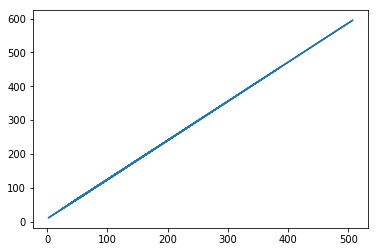

In [133]:
import matplotlib.pyplot as plt

# Plot the linear relationship using y = m * x + c, where b1 is the slope i.e. m and b0 is intercept i.e. c
plt.plot(X, (b1 * X + b0))

# Question 14 - Evaluation of model with scikit-learn 
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean square error over mean square error gives you root mean square error

In [142]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Predict Y based on X' test data
y_pred = linear_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean square error = ", mse)

rmse = sqrt(mse)
print("Root mean square error = ", rmse)


Mean square error =  96.8017756773632
Root mean square error =  9.83878934002366


---- Plotting on x_test / y_pred ----


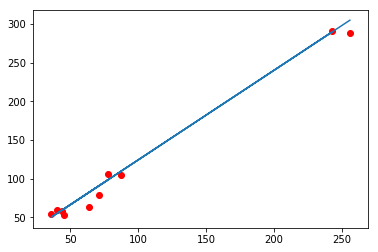

In [145]:
# Let us also plot x_test, y_pred
print("---- Plotting on x_test / y_pred ----")
plt.plot(x_test, y_pred)
# Plot the test data using scatter plot
plt.scatter(x_test, y_test, c='red')

## Question 15 - Calculate the accuracy of the model for both training and test data set 

### Hint: .score() function 

In [147]:
linear_reg.score(x_train, y_train)

0.9607964742070885

In [148]:
linear_reg.score(x_test, y_test)

0.9877342051419902

In [149]:
linear_reg.score(x_test, y_pred)

1.0